### Finding Heavy Traffic Indication on I-94

We're going to analyze a dataset sbout the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94, a station located approximately midway between Minneaplis and Saint Paul recorded the traffic data. This means that the result of our analysis will be about the westbound traffic in the proximity of the station.

We've dataset 48204 rows and 9 columns, non-null values:
 
 0   holiday              US National holidays plus regional holiday<br>
 1   temp                 Average temp in kelvin<br>
 2   rain_1h              Amount in mm of rain that occurred in the hour<br>
 3   snow_1h              Amount in mm of snow that occurred in the hour<br>
 4   clouds_all           Precentage of cloud cover<br>
 5   weather_main         Short textual description of the current weather<br>
 6   weather_description  Longer textural description of the current weather<br> 
 7   date_time            Hour of the data cillected  in local CST time<br>
 8   traffic_volume       Reported westbound traffic volume, cars<br>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic=pd.read_csv('datasets/Metro_Interstate_Traffic_Volume.csv')
traffic.head(5)
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [79]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### Analyzing traffic volume

We're going to plot a histogram to visualize the distribution of the `traffic_volume` column

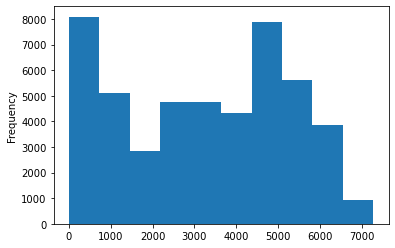

In [25]:
traffic['traffic_volume'].plot.hist() #pandas method
plt.show()

In [26]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Traffic volume varied from 0 to 7280 cars, with an average of 3260 cars. About 25% of the time, there were 1193 cars - this probably occurs during the night, or when a road is under construction. This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

#### We'll stard dividing the dataset into two paths (daytime and nighttime data pro 12 hours)

In [28]:
traffic['date_time']= pd.to_datetime(traffic['date_time'])
day= traffic.copy()[(traffic['date_time'].dt.hour >=7
                     
                    )&(traffic['date_time'].dt.hour<19)]
print(day.shape)
night = traffic.copy()[(traffic['date_time'].dt.hour>=19)|(traffic['date_time'].dt.hour<7)]
print(night.shape)

(23877, 9)
(24327, 9)


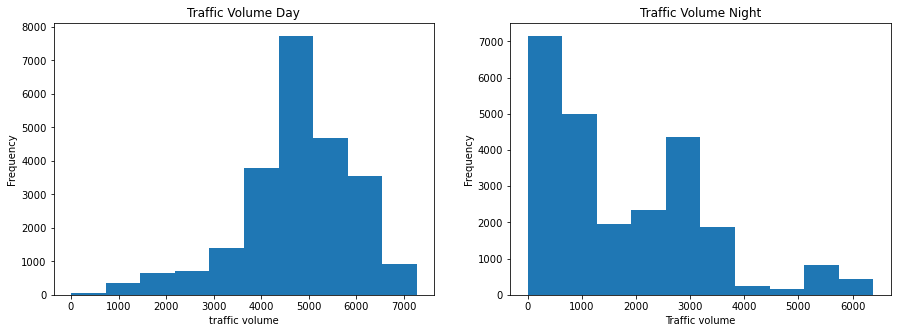

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume Day')
plt.ylabel('Frequency')
plt.xlabel('traffic volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic volume')

plt.show()

In [35]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [36]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can saw, there are 25% of value are less than 4252, and more cars passing the station each hour 75% of the time. the histogram dispaying the nighttime data is right skewed, 75 % of the time - was less than 2819 cars.

#### Indicators of heavy traffic is time.
We're going to look at a few line plot showing how traffic volume changed according to rhe following parameters (mounth, day of week and time of day). 
The faster way to get the avarege traffic volume for each month is by using the `DataFrame.groupby()`

In [41]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

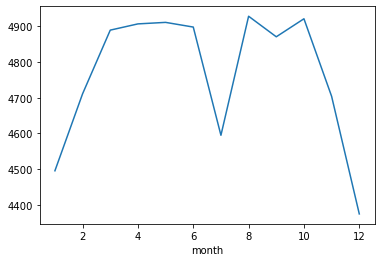

In [42]:
by_month['traffic_volume'].plot.line()
plt.show()

We have one interesting exception: July. let's control traffic volume each year in July

In [49]:
day['year'] = day['date_time'].dt.year
july = day[day['month'] == 7]
july.groupby('year').mean()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
year,,,,,,
2013,296.796832,0.529838,0.0,24.245946,4914.354054,7.0
2014,296.225777,0.296686,0.0,52.542522,4871.598240,7.0
2015,296.657288,0.457241,0.0,35.301887,4613.146226,7.0
2016,297.018584,24.633670,0.0,52.534483,3924.923645,7.0
2017,297.139799,0.000000,0.0,41.724311,4734.120301,7.0
2018,296.794566,0.000000,0.0,46.719178,4586.899543,7.0


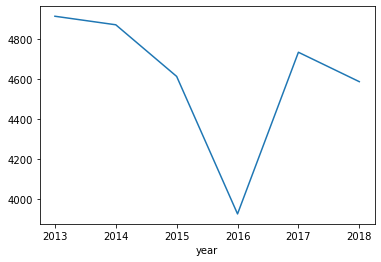

In [47]:
july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically. the traffic is heavy in July, like the other warm months. We can see actually, new about that month and reason for this.

#### Time Indicators - day of the week

In [50]:
day['dayofweek']= day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 - Monday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

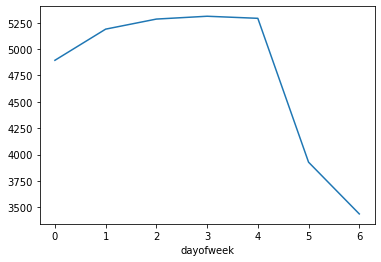

In [51]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

We can say, the traffic volume is heavier on bussness days

#### Time Indicator - time of day

In [54]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


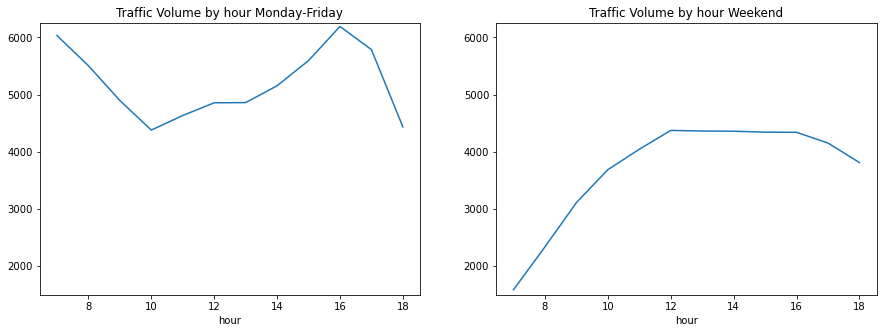

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.ylim(1500, 6250)
plt.title('Traffic Volume by hour Monday-Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500, 6250)
plt.title('Traffic Volume by hour Weekend')
plt.show()

Generally, traffic volume is heavy bussness days, the rush hours are around 7 and 16 - when most people treval from home to work and back.
To summarize, the traffic is heavier during warm month, on bussness days and the rush hours are around 7 and 16 to compared to cold month, weekend

#### Weather indicators

The dataset have a few useful columns about weather, so let's start by looking up their correlation values with `traffic_volume`

In [58]:
traffic.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

In [60]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

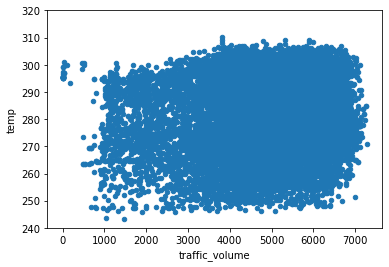

In [63]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(240, 320)
plt.show()

Temprature showa the strongest correlation with value (0.13), the other don't show any strong correlation. but didn't show any reliable inbicator of heavy traffic.
Let's calclate the avarege traffic volume associated with each unique value in those columns: `weater_mean` and `weather_discription`.


#### Weather Types



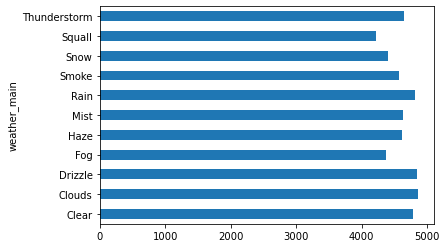

In [83]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()


In [85]:
day.groupby('weather_main').mean()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,2015.619429,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,2015.321420,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2015.882220,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2015.527574,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2015.572334,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2015.916667,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2015.486245,2.750344,12.153370


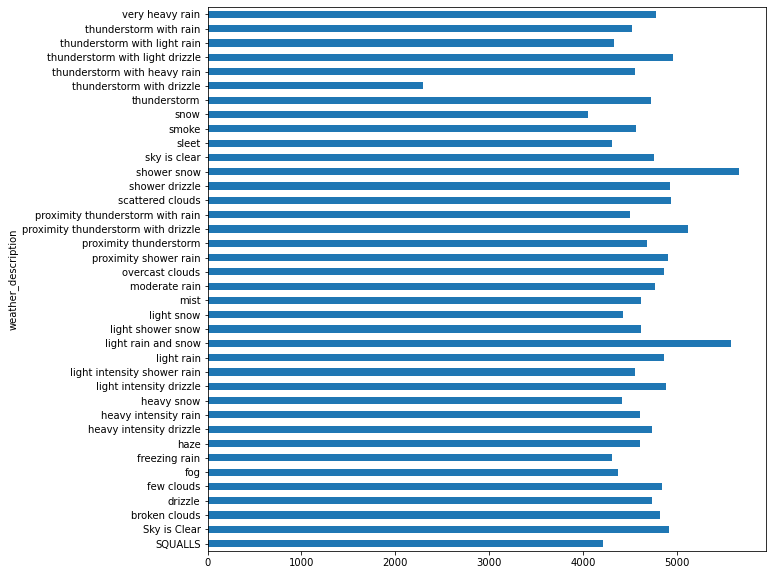

In [77]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(10,10))
plt.show()

There are three weather types where traffic volume more 5000 (Shower snow, Light rain and snow, Proximity thunderstorm with drizzle)

#### Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:
- Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

Weather indicators:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle.